In [17]:
from LHEImport.LHEImport2 import read_lhe, tohdf5
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import vector
# plt styles
plt.style.use(["science", "grid", "bright"])
plt.rcParams.update({"font.family":"serif", "font.size":20, "figure.figsize":[10,10]})

# Importing events and converting to hdf5
These events with decays carried out in madspin 

In [2]:
data_madspin = read_lhe('event_files/lhe/2111123_ttz_ms_decay.lhe')
tohdf5(data_madspin, 'event_files/hdf5/211123_ttz_ms_decay', key='unlimited')

/home/craig/.local/lib/python3.9/site-packages/pandas/core/generic.py:2703: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block0_values] [items->Index(['event_info', 'particles', 'weights'], dtype='object')]

  pytables.to_hdf(


In [3]:
df_madspin = pd.read_hdf('event_files/hdf5/211123_ttz_ms_decay.h5', 'unlimited')

# Importing events and converting to hdf5
These events with decays carried out in madgraph

In [ ]:
# data = read_lhe('event_files/lhe/ttz_mg_decay.lhe')
# # tohdf5(data, 'event_files/hdf5/ttz_mg_decay', key='limited', limit_events=True)
# tohdf5(data, 'event_files/hdf5/ttz_mg_decay', key='unlimited')

In [7]:
df_madgraph = pd.read_hdf('event_files/hdf5/ttz_mg_decay.h5', 'unlimited')

## Generate a list of particles involved

In [4]:
initial_particles = []
intermediate_particles = []
final_particles = []
for index, row in df_madspin.iterrows():
    for particle in row['particles']:
        if particle.pdgid not in initial_particles and particle.status==-1:
            initial_particles.append(particle.pdgid)
        elif particle.pdgid not in intermediate_particles and particle.status==2:
            intermediate_particles.append(particle.pdgid)
        elif particle.pdgid not in final_particles and particle.status==1:
            final_particles.append(particle.pdgid)
            
            
                

In [5]:
print(initial_particles)
print(intermediate_particles)
print(final_particles)

[21, -1, 1, 2, -2, -3, 3, 5, -5, 4, -4]
[6, 24, -6, -24, 23]
[5, -11, 12, -5, 1, -2, -13, 13, 3, -4]


In [8]:
weights_spin = []
for ind, row in df_madgraph.iterrows():
    weights_spin.append(row.weights['1'])
print(weights_spin[1])

weights_graph= []
for ind, row in df_madspin.iterrows():
    weights_graph.append(row.weights['1'])
print(weights_graph[1])
   

0.0018262185
0.0020605272


In [9]:
spin_mass = []
graph_mass = []
for index, row in df_madspin.iterrows():
    spin = vector.obj(px=0, py=0, pz=0, E=0)
    for particle in row.particles: 
        if abs(particle.pdgid) == 13:
            spin += particle.fourvec
    spin_mass.append(spin.m)
print(spin_mass[0])    
for index2, row2 in df_madgraph.iterrows():
    graph = vector.obj(px=0, py=0, pz=0, E=0)
    for particle in row2.particles: 
        if abs(particle.pdgid) == 13:
            graph += particle.fourvec
    graph_mass.append(graph.m)
print(graph_mass[0])

93.00217728499877
89.50761386682356


[]

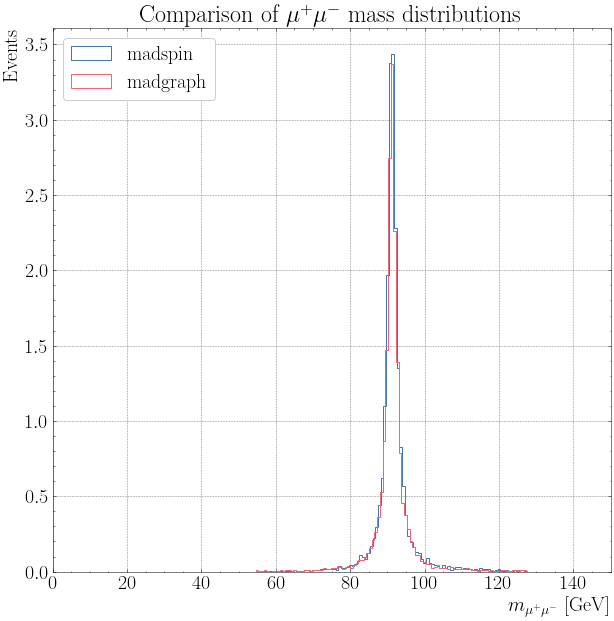

In [26]:
# for index,row in df_zvv_decay.iterrows():
#     graph = vector.obj(px=0, py=0, pz=0, E=0)
#     for particle in row.particles: 
#         if particle.pdgid == 23:
#             z_mass.append(particle.m)
#         elif abs(particle.pdgid) == 13:
#             mutotal += particle.fourvec
#     mu_energy.append(mutotal.e) 
# weights = []
# for ind, row in df_zvv_decay.iterrows():
#     weights.append(row.weights['1'])
# fig, axes = plt.subplots(1,2)
plt.hist(spin_mass, histtype='step',weights=weights_graph,bins=100, label='madspin') 
plt.hist(graph_mass, histtype='step',weights=weights_spin,bins=100, label='madgraph') 
plt.xlabel('$m_{\mu^+\mu^-}$ [GeV]',loc='right')
plt.ylabel('Events', loc='top')
# axes[0].set_title('spin') 
# axes[0].set_xlabel('$m_Z$ [GeV]') 
# axes[0].set_xlim(0,150)
# axes[1].set_title('graph') 
# axes[1].set_xlabel('$E_\mu^+ E_\mu^-$ [GeV]') 
plt.xlim(0,150)
plt.title('Comparison of $\mu^+ \mu^-$ mass distributions')
plt.legend()
plt.savefig('z_mass_mu_pair_spin_graph.jpg')
plt.plot()